# Covid 19 Data Analysis

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import plotly.express as px

# Import dataset 

In [3]:
data = pd.read_csv(r"E:\c drive\Desktop\CloudyML\New CloudyML\Python\Python Data Analysis Projects\Covid 19 Data Analysis\covid19.csv")

In [4]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


## Explore data

In [5]:
data.shape

(187, 15)

In [6]:
data.count()

Country/Region            187
Confirmed                 187
Deaths                    187
Recovered                 187
Active                    187
New cases                 187
New deaths                187
New recovered             187
Deaths / 100 Cases        187
Recovered / 100 Cases     187
Deaths / 100 Recovered    187
Confirmed last week       187
1 week change             187
1 week % increase         187
WHO Region                187
dtype: int64

In [8]:
data.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64

In [9]:
data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [10]:
len(data)

187

In [11]:
data.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

## 1) Which WHO region has highest confirmed cases ?

In [15]:
data.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending = False)

WHO Region
Americas                 8839286
Europe                   3299523
South-East Asia          1835297
Eastern Mediterranean    1490744
Africa                    723207
Western Pacific           292428
Name: Confirmed, dtype: int64

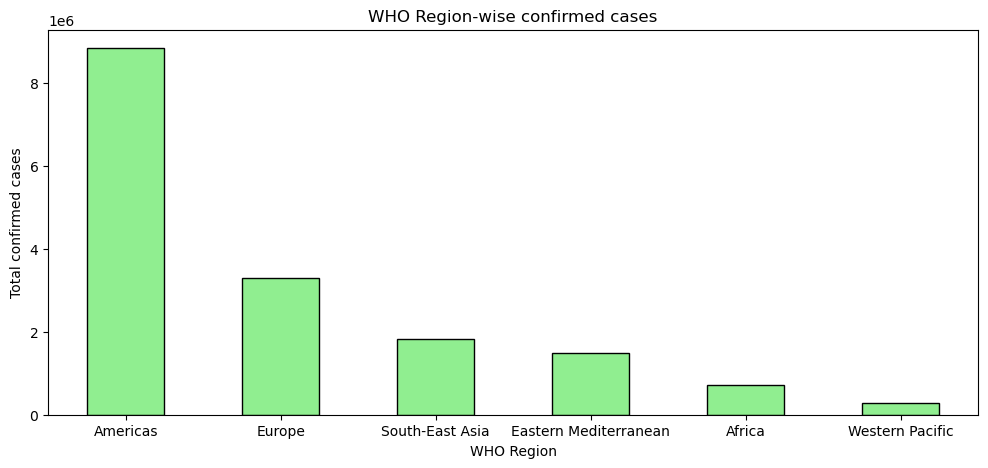

In [32]:
py.figure(figsize = (12,5))
data.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending = False).plot(kind = "bar", color = "lightgreen" , edgecolor = "black")
py.title("WHO Region-wise confirmed cases")
py.ylabel("Total confirmed cases")
py.xticks(rotation = 0)
py.show()

## 2) Which country has highest active cases ?

In [33]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [36]:
data.groupby("Country/Region")["Active"].sum().sort_values(ascending = False)

Country/Region
US                2816444
Brazil             508116
India              495499
United Kingdom     254427
Russia             201097
                   ...   
Holy See                0
San Marino              0
Brunei                  0
Dominica                0
Grenada                 0
Name: Active, Length: 187, dtype: int64

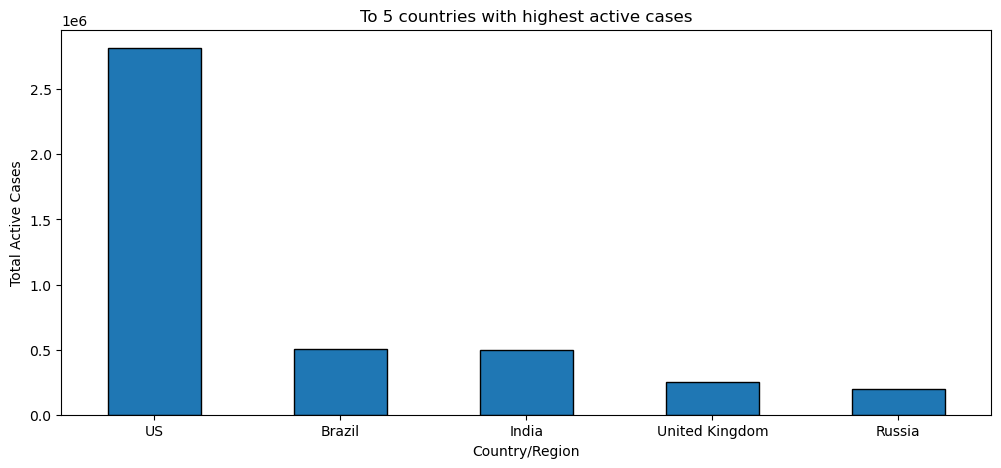

In [46]:
py.figure(figsize = (12 , 5))
data.groupby("Country/Region")["Active"].sum().sort_values(ascending = False).head(5).plot(kind = "bar" , edgecolor = "black")
py.ylabel("Total Active Cases")
py.title("To 5 countries with highest active cases")
py.xticks(rotation = 0)
py.show()

## 3) Draw correlation between various variable in dataset

In [48]:
data[["Confirmed" , "Deaths" , "Recovered" , "Active"]]

,Confirmed,Deaths,Recovered,Active
0,36263,1269,25198,9796
1,4880,144,2745,1991
2,27973,1163,18837,7973
3,907,52,803,52
4,950,41,242,667
...,...,...,...,...
182,10621,78,3752,6791
183,10,1,8,1
184,1691,483,833,375
185,4552,140,2815,1597


In [50]:
correlation = data[["Confirmed" , "Deaths" , "Recovered" , "Active"]].corr()
correlation

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.934698,0.906377,0.927018
Deaths,0.934698,1.000000,0.832098,0.871586
Recovered,0.906377,0.832098,1.000000,0.682103
Active,0.927018,0.871586,0.682103,1.000000


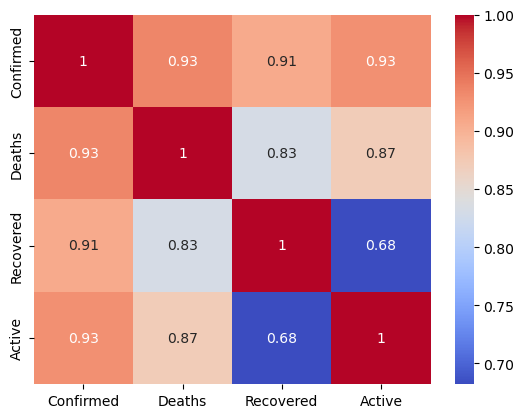

In [59]:
sns.heatmap(correlation , cmap = "coolwarm" , annot = True)
py.show()

## 4) What is fatality rate ?

In [61]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [66]:
data["Deaths"] / data["Confirmed"] * 100

0       3.499435
1       2.950820
2       4.157581
3       5.733186
4       4.315789
         ...    
182     0.734394
183    10.000000
184    28.562980
185     3.075571
186     1.331361
Length: 187, dtype: float64

In [67]:
data["Fatality rate"] = data["Deaths"] / data["Confirmed"] * 100
data["Fatality rate"]

0       3.499435
1       2.950820
2       4.157581
3       5.733186
4       4.315789
         ...    
182     0.734394
183    10.000000
184    28.562980
185     3.075571
186     1.331361
Name: Fatality rate, Length: 187, dtype: float64

## 5) What is recovery rate ?

In [68]:
data.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820


In [70]:
data["Recovered"] / data["Confirmed"] * 100

0      69.486805
1      56.250000
2      67.339935
3      88.533627
4      25.473684
         ...    
182    35.326240
183    80.000000
184    49.260792
185    61.840949
186    20.044379
Length: 187, dtype: float64

In [71]:
data["Recovery rate"] = data["Recovered"] / data["Confirmed"] * 100

data["Recovery rate"]

0      69.486805
1      56.250000
2      67.339935
3      88.533627
4      25.473684
         ...    
182    35.326240
183    80.000000
184    49.260792
185    61.840949
186    20.044379
Name: Recovery rate, Length: 187, dtype: float64

## 6) Derive relationship between recovery and fatality rate

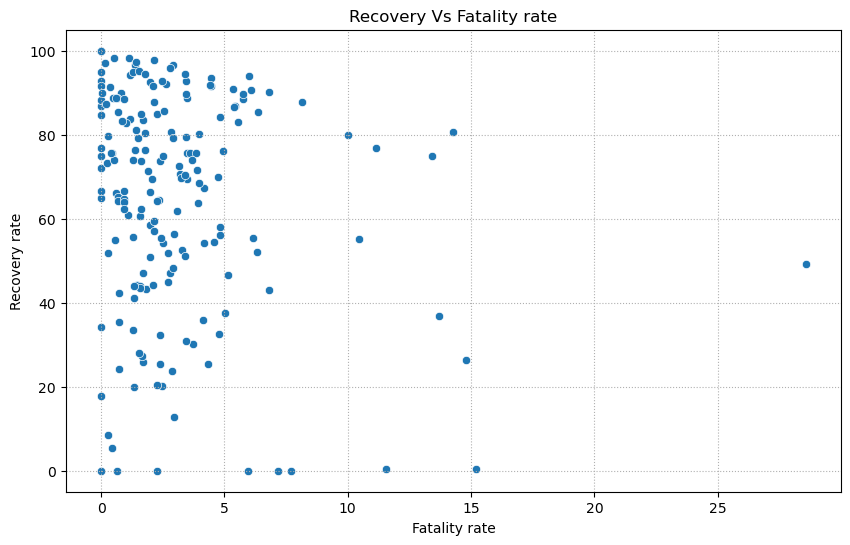

In [83]:
py.figure(figsize = ( 10,6))
sns.scatterplot( x = "Fatality rate" , y = "Recovery rate" , data = data)
py.title("Recovery Vs Fatality rate")
py.grid(axis = "x" , linestyle = ":")
py.grid(axis = "y" , linestyle = ":")
py.show()


## Conclusion : Recovery rate is higher than fatality rate, that means medicine works 

## 7) Which country has highest new cases ?

In [84]:
data.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality rate,Recovery rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000


In [87]:
data.groupby("Country/Region")["New cases"].sum().sort_values(ascending = False)

Country/Region
US                   56336
India                44457
Brazil               23284
Colombia             16306
Peru                 13756
                     ...  
Spain                    0
Equatorial Guinea        0
Liechtenstein            0
Latvia                   0
Estonia                  0
Name: New cases, Length: 187, dtype: int64

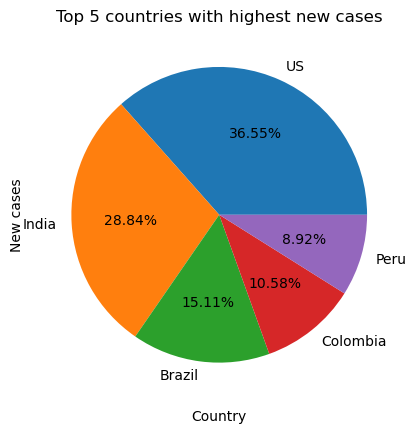

In [95]:
data.groupby("Country/Region")["New cases"].sum().sort_values(ascending = False).head(5).plot(kind = "pie", autopct = "%1.2f%%")
py.title("Top 5 countries with highest new cases")
py.xlabel("Country")
py.show()

## 8) Relation between deaths and recovered

In [97]:
data.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality rate,Recovery rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000


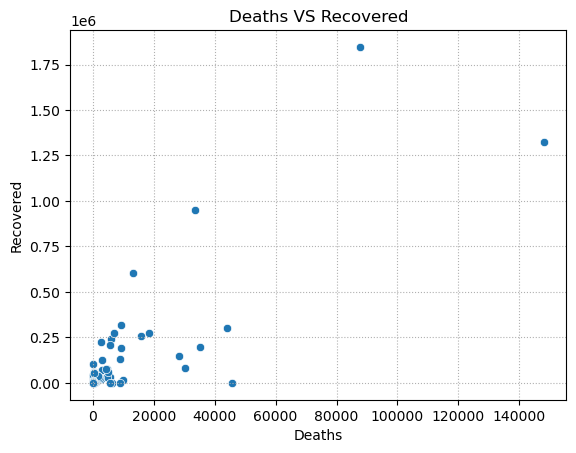

In [101]:
sns.scatterplot(data = data , x = "Deaths" , y = "Recovered")
py.title("Deaths VS Recovered")
py.grid(axis = "x" , linestyle = ":")
py.grid(axis = "y" , linestyle = ":")
py.show()

## 9) Which country / region has highest deaths cases ?

In [103]:
data.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality rate,Recovery rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000


In [106]:
data.groupby("Country/Region")["Deaths"].sum().sort_values(ascending = False)

Country/Region
US                148011
Brazil             87618
United Kingdom     45844
Mexico             44022
Italy              35112
                   ...  
Laos                   0
Greenland              0
Cambodia               0
Grenada                0
Mongolia               0
Name: Deaths, Length: 187, dtype: int64

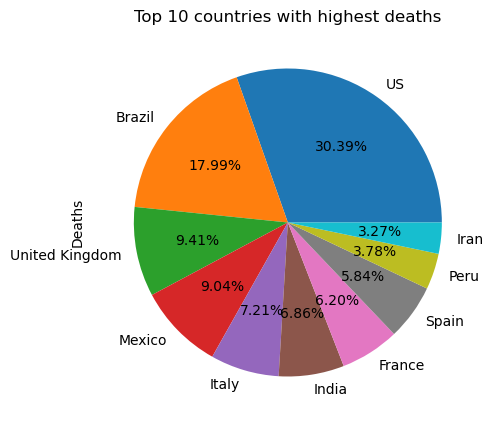

In [112]:

data.groupby("Country/Region")["Deaths"].sum().sort_values(ascending = False).head(10).plot(kind = "pie", autopct = "%1.2f%%")
py.title("Top 10 countries with highest deaths")
py.show()

## 10) Relation between confirmed and deaths

Text(0.5, 1.0, 'Confirmed Vs Deaths')

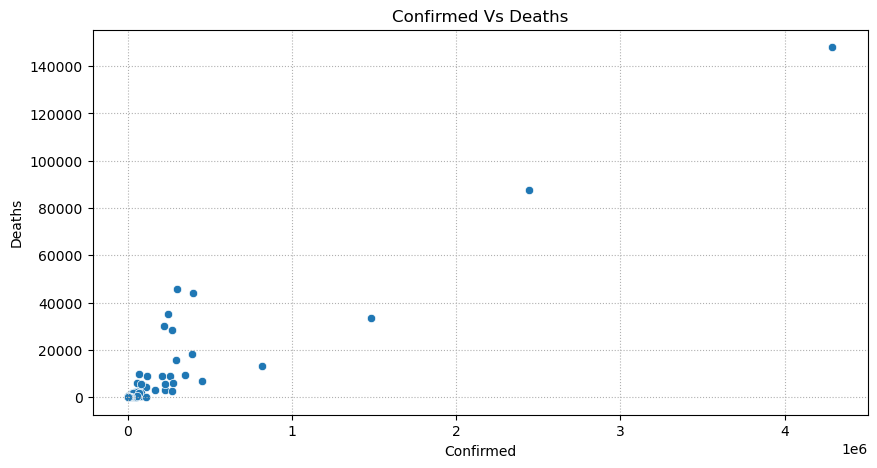

In [121]:
py.figure(figsize = (10 , 5))
sns.scatterplot( data = data , x = "Confirmed" , y = "Deaths")
py.grid(axis = "x" , linestyle = ":")
py.grid(axis = "y" , linestyle = ":")
py.title("Confirmed Vs Deaths")

In [123]:
px.scatter(data , x = "Confirmed" , y = "Deaths" , color = "WHO Region")

In [119]:
px.scatter(data , x = "Confirmed" , y = "Deaths" , color = "Country/Region")

## 11) Which country has highest Deaths / 100 Cases ?

In [125]:
data.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality rate,Recovery rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000


In [129]:
data.groupby("Country/Region")["Deaths / 100 Cases"].sum().sort_values(ascending = False).head(10)

Country/Region
Yemen             28.56
United Kingdom    15.19
Belgium           14.79
Italy             14.26
France            13.71
Hungary           13.40
Netherlands       11.53
Mexico            11.13
Spain             10.44
Western Sahara    10.00
Name: Deaths / 100 Cases, dtype: float64

Text(0.5, 1.0, 'Top 10 countries with highest Deaths/100 Cases')

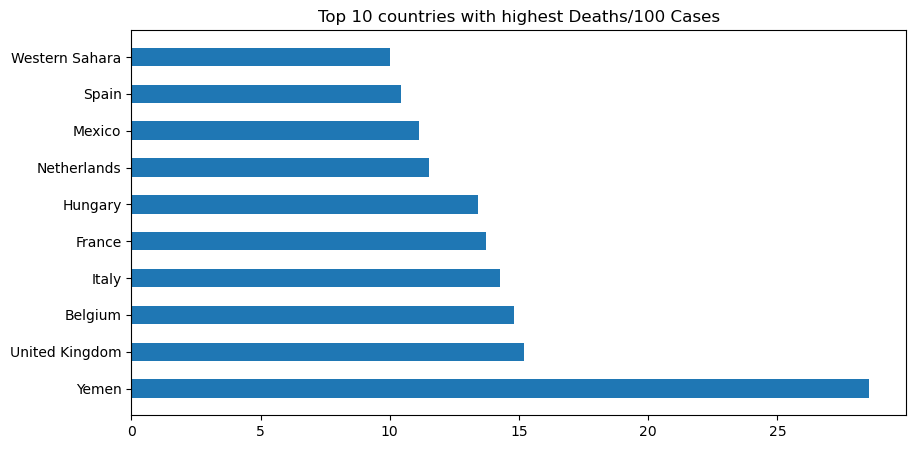

In [144]:

py.figure(figsize = (10 , 5))
df = data.groupby("Country/Region")["Deaths / 100 Cases"].sum().sort_values(ascending = False).head(10)

py.barh(df.index , df , 0.5)
py.title("Top 10 countries with highest Deaths/100 Cases")
